# Lab 08: Train vanilla neural network -- exercise


# Training a one-layer net on  FASHION-MNIST

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the TRAINING SET (data+labels)

In [11]:
train_data=torch.load('../data/fashion-mnist/train_data.pt')
train_label=torch.load('../data/fashion-mnist/train_label.pt')
print(train_data.size())
print(train_label.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


### Download the TEST SET (data only)

In [12]:
test_data=torch.load('../data/fashion-mnist/test_data.pt')
print(test_data.size())

torch.Size([10000, 28, 28])


### Make a one layer net class

In [29]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        self.mylayer=nn.Linear(input_size,output_size,bias=True)
        
    def forward(self, x):
        
        x = self.mylayer(x)
        p = F.softmax(x,dim=1)
        
        return p

### Build the net

In [30]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (mylayer): Linear(in_features=784, out_features=10, bias=True)
)


### Take the 4th image of the test set:

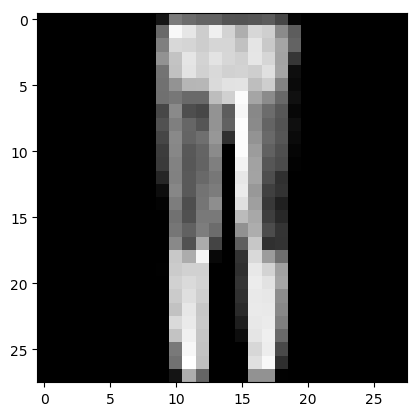

In [31]:
im= test_data[3]
utils.show(im)

### And feed it to the UNTRAINED network:

In [32]:
p = net(im.view(1,784))
print(p)

tensor([[0.1097, 0.0965, 0.0888, 0.0962, 0.0754, 0.0834, 0.1331, 0.1054, 0.1120,
         0.0993]], grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

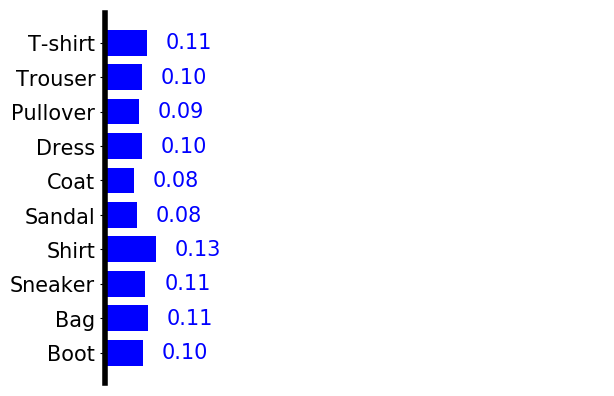

In [33]:
utils.show_prob_fashion_mnist(p)

### Train the network (only 5000 iterations) on the train set

In [34]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # choose a random integer between 0 and 59,999 
    # extract the corresponding picture and label
    # and reshape them to fit the network

    idx=randint(0,59999)
    input=train_data[idx].view(1,784)
    label=train_label[idx].view(1)


    # feed the input to the net  
    input.requires_grad_()
    prob=net(input) 
 
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

### Take the 34th image of the test set:

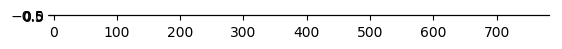

In [35]:
im= test_data[33].view(1,784)
utils.show(im)

### Feed it to the TRAINED net:

In [36]:
p = net(im)
print(p)

tensor([[1.5811e-02, 6.4897e-04, 1.2297e-02, 9.5917e-01, 7.2518e-04, 3.6466e-06,
         1.1097e-02, 3.0574e-05, 2.0053e-04, 1.7614e-05]],
       grad_fn=<SoftmaxBackward>)


### Display visually the confidence scores

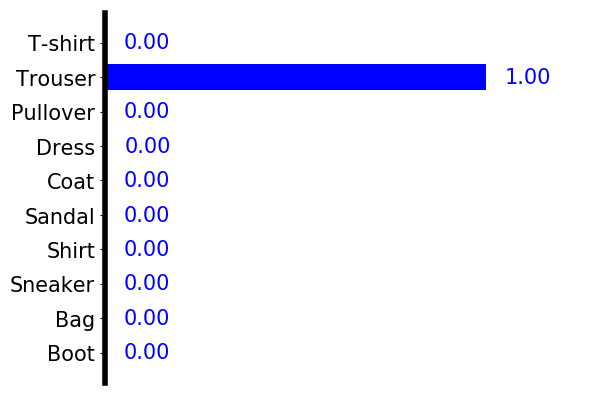

In [37]:
utils.show_prob_fashion_mnist(prob)

### Choose image at random from the test set and see how good/bad are the predictions

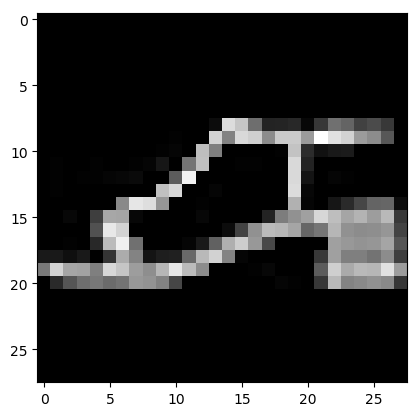

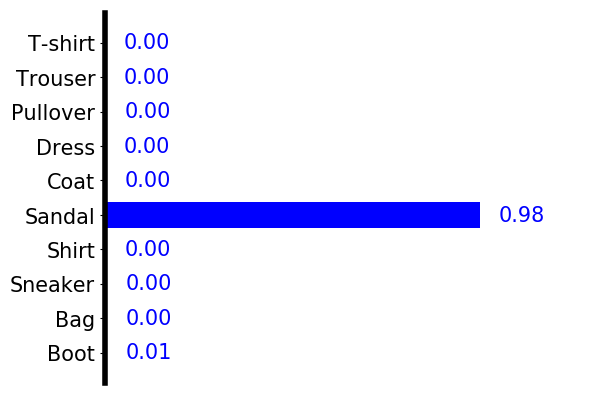

In [38]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
utils.show_prob_fashion_mnist(prob)